# Final Project Submission#
Please fill out:

Student name:
Student pace: self paced / part time / full time
Scheduled project review date/time:
Instructor name:
Blog post URL:

Import required packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.datasets import load_iris

import sqlite3

## Import different databases to dataframes

#### Import movie table and transform data to analysis requirement

In [121]:
df_budget= pd.read_csv(r'zippedData\tn.movie_budgets.csv.gz', compression='gzip')

In [122]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Checking the data types and composition of the table

In [123]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Converting production budget, worldwide gross to float format

In [124]:
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(",", "")
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace("$", "").astype(float)
df_budget['production_budget'] = df_budget['production_budget'].str.replace(",", "")
df_budget['production_budget'] = df_budget['production_budget'].str.replace("$", "").astype(float)

Generate a ratio to normalize revenue information

In [125]:
df_budget['Profitability_Ratio'] = (df_budget['worldwide_gross']-df_budget['production_budget'])/df_budget['production_budget']

In [126]:
df_budget.describe()

,id,production_budget,worldwide_gross,Profitability_Ratio
count,5782.000000,5.782000e+03,5.782000e+03,5782.000000
mean,50.372363,3.158776e+07,9.148746e+07,3.800161
std,28.821076,4.181208e+07,1.747200e+08,29.530282
min,1.000000,1.100000e+03,0.000000e+00,-1.000000
25%,25.000000,5.000000e+06,4.125415e+06,-0.507704
50%,50.000000,1.700000e+07,2.798445e+07,0.708310
75%,75.000000,4.000000e+07,9.764584e+07,2.758346
max,100.000000,4.250000e+08,2.776345e+09,1799.000000


In [ ]:
Remove the outlier profitability ratio greater than 50.

In [137]:
df_budget = df_budget.loc[df_budget['Profitability_Ratio']<=50]

Categorize the profitability ratios into Loss,Low Profit, Medium Profit and high profit  in a new colum called prof_cat 

In [138]:
df_budget['prof_cat'] = ['Loss' if x < 0 else 'Low Profit' if x < 1 else 'Medium Profit' if x < 3 else 'high Profit' for x in df_budget['Profitability_Ratio']]

In [139]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability_Ratio,prof_cat
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,5.532577,high Profit
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,1.546673,Medium Profit
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,-0.572108,Loss
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,3.243841,high Profit
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,3.153696,high Profit


In [140]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5721 entries, 0 to 5780
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5721 non-null   int64  
 1   release_date         5721 non-null   object 
 2   movie                5721 non-null   object 
 3   production_budget    5721 non-null   float64
 4   domestic_gross       5721 non-null   object 
 5   worldwide_gross      5721 non-null   float64
 6   Profitability_Ratio  5721 non-null   float64
 7   prof_cat             5721 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 402.3+ KB


#### Import tmdb.movies table

In [141]:
df_movies = pd.read_csv(r'zippedData\tmdb.movies.csv.gz', compression='gzip')

In [142]:
df_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [143]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


#### Import rt.reviews table

In [144]:
df_review = pd.read_csv(r'zippedData/rt.reviews.tsv.gz', compression='gzip', delimiter='\t', encoding='latin1')

In [145]:
df_review.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [146]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


#### Import im.db table

In [147]:
conn = sqlite3.connect('zippedData/im.db/im.db')

In [148]:
pd.read_sql("""
SELECT *
FROM sqlite_master

""",conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


# Import entity relationship diagram(need to do)

#### Import rt.movie_info table

In [149]:
df_movie_info = pd.read_csv(r'zippedData/rt.movie_info.tsv.gz', compression='gzip', delimiter='\t', encoding='latin1')

In [150]:
df_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [151]:
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


#### Import bom.movie_gross table

In [152]:
df_bom = pd.read_csv(r'zippedData/bom.movie_gross.csv.gz', compression='gzip')

In [153]:
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [154]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### Identify the relationship between Genres and profitability

Assign movie)basic information to df_movie_basic dataframe

In [155]:
df_movie_basic= pd.read_sql("""
SELECT *
  FROM movie_basics
      
""", conn)

In [156]:
df_movie_basic['genres'].value_counts()

Documentary                32185
Drama                      21486
Comedy                      9177
Horror                      4372
Comedy,Drama                3519
                           ...  
Comedy,Fantasy,Sport           1
Biography,Romance,War          1
Fantasy,History,War            1
Biography,Music,Musical        1
Music,Sci-Fi,Thriller          1
Name: genres, Length: 1085, dtype: int64

##### Removed Genres with count of less than 25 as statistical test could be skewed with categories with less numbers

In [157]:
df_movie_basic = df_movie_basic[df_movie_basic['genres'].map(df_movie_basic['genres'].value_counts()) >= 25]

In [158]:
df_movie_basic['genres'].value_counts()

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Drama,Horror           26
Comedy,Romance,Thriller          25
Action,Documentary,History       25
Biography,Drama,Thriller         25
Documentary,Sci-Fi               25
Name: genres, Length: 311, dtype: int64

Merge budget table and movie basic table to test the relationship between Generes and profitability ratio

In [159]:
merged_budgets_and_movie_basic = df_movie_basic.merge(df_budget, left_on='primary_title', right_on='movie', how='inner')

Check for null values in the table

In [160]:
merged_budgets_and_movie_basic.isna().sum()

movie_id                 0
primary_title            0
original_title           0
start_year               0
runtime_minutes        420
genres                   0
id                       0
release_date             0
movie                    0
production_budget        0
domestic_gross           0
worldwide_gross          0
Profitability_Ratio      0
prof_cat                 0
dtype: int64

In [161]:
merged_budgets_and_movie_basic.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability_Ratio,prof_cat
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000.0,$0,73706.0,-0.998362,Loss
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,20000000.0,"$70,433,227",122133227.0,5.106661,high Profit
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,25000000.0,"$720,828",9313302.0,-0.627468,Loss
3,tt2404548,On the Road,On the Road,2011,90.0,Drama,17,"Mar 22, 2013",On the Road,25000000.0,"$720,828",9313302.0,-0.627468,Loss
4,tt3872966,On the Road,On the Road,2013,87.0,Documentary,17,"Mar 22, 2013",On the Road,25000000.0,"$720,828",9313302.0,-0.627468,Loss


Generate cross tab for chi-square test

In [162]:
contingency_table=pd.crosstab(index=merged_budgets_and_movie_basic["genres"],columns=merged_budgets_and_movie_basic["prof_cat"])

In [163]:
contingency_table

prof_cat,Loss,Low Profit,Medium Profit,high Profit
genres,,,,
Action,21,11,5,9
"Action,Adventure",2,1,2,1
"Action,Adventure,Animation",1,3,5,8
"Action,Adventure,Biography",1,2,2,0
"Action,Adventure,Comedy",10,3,9,11
...,...,...,...,...
"Sci-Fi,Thriller",3,1,2,2
Sport,2,1,0,0
Thriller,38,17,12,13


Conduct chi-square test for statistical significance

In [164]:
stats.contingency.chi2_contingency(contingency_table)

(1023.2071409314855,
 5.8970440516994845e-09,
 777,
 array([[18.978389  ,  8.37889419,  9.46337356,  9.17934325],
        [ 2.47544204,  1.09289924,  1.23435307,  1.19730564],
        [ 7.01375246,  3.09654785,  3.49733371,  3.39236598],
        ...,
        [33.00589391, 14.5719899 , 16.45804098, 15.96407522],
        [ 1.6502947 ,  0.72859949,  0.82290205,  0.79820376],
        [ 3.30058939,  1.45719899,  1.6458041 ,  1.59640752]]))

As indicated above it is possible to reject null hypothesis at 5% confidence level. Therefore through the chi-square test it is proven that there is a significant relationship between genere and profitability ratio.

To identify which category of genere shows highest profitability identied those groups.

In [165]:
merged_budgets_and_movie_basic_1 = merged_budgets_and_movie_basic.groupby(merged_budgets_and_movie_basic['genres']).mean()

In [166]:
merged_budgets_and_movie_basic_1.sort_values(by=['Profitability_Ratio'],ascending=False).head()

,start_year,runtime_minutes,id,production_budget,worldwide_gross,Profitability_Ratio
genres,,,,,,
"Family,Fantasy",2015.000000,NaN,46.000000,2.364462e+07,5.799091e+07,17.764188
"Horror,Mystery,Thriller",2014.883721,91.357143,56.534884,1.406651e+07,7.850201e+07,9.045143
"Comedy,Fantasy",2014.200000,97.500000,54.000000,4.070000e+07,2.495389e+08,8.495882
"Action,Comedy,Documentary",2010.000000,95.000000,98.000000,2.000000e+07,1.716858e+08,7.584290
"Crime,Horror,Mystery",2015.000000,90.800000,44.600000,1.160000e+07,7.801411e+07,7.234612


There on profitability point of view companies can focus on 
1. Family,Fantasy
2. Horror,Mystery,Thriller
3. Comedy,Fantasy
4. Action,Comedy,Documentary
5. Crime,Horror,Mystery

### Identify the relationship between Runtime and profitability

Using already assigned table of df_movie_basic

In [247]:
df_runtime = pd.read_sql("""
SELECT *
  FROM movie_basics
      
""", conn)

In [248]:
df_runtime.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


Categorize the movie run time into 'Extremly short movie', 'Short Movie', 'Average Movie', 'Long Movie'

In [249]:
df_runtime['Runtime_cat'] = ['Extremly short Movie' if x < 20 else 'Short Movie' if x < 90 else 'Average Movie' if x < 120 else 'Long Movie' for x in df_runtime['runtime_minutes'] ]

In [250]:
df_runtime.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Runtime_cat
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Long Movie
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Average Movie
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Long Movie
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Long Movie
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Short Movie


Merging movie basic with buget table

In [251]:
merged_runtime_and_budgets = df_budget.merge(df_runtime, left_on='movie', right_on='primary_title', how='left')

In [252]:
merged_runtime_and_budgets.isna().sum()

id                        0
release_date              0
movie                     0
production_budget         0
domestic_gross            0
worldwide_gross           0
Profitability_Ratio       0
prof_cat                  0
movie_id               3362
primary_title          3362
original_title         3363
start_year             3362
runtime_minutes        3842
genres                 3434
Runtime_cat            3362
dtype: int64

In [253]:
merged_runtime_and_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability_Ratio,prof_cat,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Runtime_cat
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,5.532577,high Profit,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,Average Movie
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,1.546673,Medium Profit,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",Long Movie
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,-0.572108,Loss,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",Average Movie
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,3.243841,high Profit,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",Long Movie
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,3.153696,high Profit,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
merged_runtime_and_budgets['Runtime_cat'].value_counts()

Average Movie           1795
Long Movie               995
Short Movie              898
Extremly short Movie      73
Name: Runtime_cat, dtype: int64

As movies cannot be less than 20 mins removed movies with less than 20 minutes runtime.

In [255]:
#merged_runtime_and_budgets = merged_runtime_and_budgets.loc[merged_runtime_and_budgets['runtime_minutes']>20]

Conduct chi-square test to test the significance of below hypothesis

H0 : There is no significant relationship between runtime and prifitability ratio
H1 : There is a significant relationship between runtime and prifitability ratio

Generate cross tabs to run chisquare test

In [256]:
contingency_table=pd.crosstab(index=merged_runtime_and_budgets["Runtime_cat"],columns=merged_runtime_and_budgets["prof_cat"])
contingency_table

prof_cat,Loss,Low Profit,Medium Profit,high Profit
Runtime_cat,,,,
Average Movie,713,331,392,359
Extremly short Movie,35,11,17,10
Long Movie,386,178,213,218
Short Movie,426,162,134,176


Run chi-square test to identify significance

In [257]:
stats.contingency.chi2_contingency(contingency_table)

(31.026636850323268,
 0.0002929332709290141,
 9,
 array([[744.53602765, 325.49587876, 360.8136134 , 364.15448019],
        [ 30.27918107,  13.23743685,  14.67375698,  14.8096251 ],
        [412.7093858 , 180.42807764, 200.00531773, 201.85721882],
        [372.47540548, 162.83860675, 180.50731189, 182.17867588]]))

As indicated above it is possible to reject null hypothesis at 5% confidence level. Therefore through the chi-square test it is proven that there is a significant relationship between runtime and profitability ratio.

To identify which category of genere shows highest profitability identied those groups.

In [258]:
merged_budgets_and_movie_basic_1 = merged_runtime_and_budgets.groupby(merged_runtime_and_budgets['Runtime_cat']).mean()

In [259]:
merged_budgets_and_movie_basic_1.sort_values(by=['Profitability_Ratio'],ascending=False).head()

,id,production_budget,worldwide_gross,Profitability_Ratio,start_year,runtime_minutes
Runtime_cat,,,,,,
Long Movie,48.485427,4.423515e+07,1.329918e+08,2.048488,2015.008040,135.662136
Short Movie,49.297327,2.396982e+07,6.078761e+07,1.914196,2014.133630,73.402004
Average Movie,51.892479,3.132719e+07,8.804458e+07,1.756315,2013.927019,102.114206
Extremly short Movie,52.273973,3.489740e+07,1.028493e+08,1.281800,2015.082192,8.945205


In [241]:
merged_runtime_and_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability_Ratio,prof_cat,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Runtime_cat
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,5.532577,high Profit,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,Average Movie
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,1.546673,Medium Profit,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",Long Movie
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,-0.572108,Loss,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",Average Movie
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,3.243841,high Profit,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",Long Movie
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,5.827114,high Profit,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",Long Movie


In [245]:
x = merged_runtime_and_budgets['runtime_minutes'] 
y = merged_runtime_and_budgets['Profitability_Ratio']


r = np.corrcoef(x, y)
r

array([[1.        , 0.03868918],
       [0.03868918, 1.        ]])

### Identify the relationship between Average Rating and profitability

Pull title wise movie rating using movie_basics and movie_ratings tables

In [179]:
df_rating= pd.read_sql("""
SELECT DISTINCT m.primary_title,m.original_title,mr.averagerating 
  FROM movie_basics as m
  JOIN movie_ratings as mr
      USING(movie_id)
""", conn)

In [180]:
df_rating.head()

,primary_title,original_title,averagerating
0,Sunghursh,Sunghursh,7.0
1,One Day Before the Rainy Season,Ashad Ka Ek Din,7.2
2,The Other Side of the Wind,The Other Side of the Wind,6.9
3,Sabse Bada Sukh,Sabse Bada Sukh,6.1
4,The Wandering Soap Opera,La Telenovela Errante,6.5


Merge movie ratings table with profitablity table

In [181]:
merged_ratings_and_budgets = df_budget.merge(df_rating, left_on='movie', right_on='primary_title', how='inner')

In [182]:
merged_ratings_and_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability_Ratio,prof_cat,primary_title,original_title,averagerating
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,5.532577,high Profit,Avatar,Abatâ,6.1
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,1.546673,Medium Profit,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,6.6
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,-0.572108,Loss,Dark Phoenix,Dark Phoenix,6.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,3.243841,high Profit,Avengers: Age of Ultron,Avengers: Age of Ultron,7.3
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,5.827114,high Profit,Avengers: Infinity War,Avengers: Infinity War,8.5


In [183]:
merged_ratings_and_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2834 entries, 0 to 2833
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2834 non-null   int64  
 1   release_date         2834 non-null   object 
 2   movie                2834 non-null   object 
 3   production_budget    2834 non-null   float64
 4   domestic_gross       2834 non-null   object 
 5   worldwide_gross      2834 non-null   float64
 6   Profitability_Ratio  2834 non-null   float64
 7   prof_cat             2834 non-null   object 
 8   primary_title        2834 non-null   object 
 9   original_title       2834 non-null   object 
 10  averagerating        2834 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 265.7+ KB


Scatter plot to understand the relationship

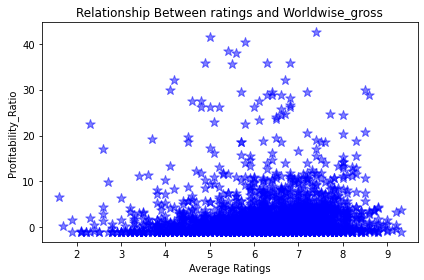

In [184]:
fig, ax = plt.subplots(figsize=(6, 4))

# These are all arguments that go in the plot's function
ax.scatter(merged_ratings_and_budgets['averagerating'], merged_ratings_and_budgets['Profitability_Ratio'],
           c='blue',
           alpha=0.5,
           s=100,
           marker='*')

ax.set_xlabel('Average Ratings')
ax.set_ylabel('Profitability_Ratio')
ax.set_title('Relationship Between ratings and Worldwise_gross')

plt.tight_layout()

Test the correlation between two average rating and profitability ratio.

In [185]:
x = merged_ratings_and_budgets['averagerating'] 
y = merged_ratings_and_budgets['Profitability_Ratio']


r = np.corrcoef(x, y)
r

array([[1.        , 0.09342388],
       [0.09342388, 1.        ]])

The correlation between average rating and profitability is 0.09. This indicate there is no relationship between rating and profitability.

### Identify the relationship between Profile and profitability

In [217]:
df_dir= pd.read_sql("""
SELECT DISTINCT m.movie_id,m.primary_title as primary_title ,m.original_title,p.primary_name,p.primary_profession
  FROM movie_basics as m
  JOIN directors as d
      USING(movie_id)
  JOIN persons as p
      USING(person_id)
""", conn)

In [218]:
df_dir.head()

,movie_id,primary_title,original_title,primary_name,primary_profession
0,tt0063540,Sunghursh,Sunghursh,Harnam Singh Rawail,"director,writer,producer"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,Mani Kaul,"director,writer,actor"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,Orson Welles,"actor,director,writer"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,Hrishikesh Mukherjee,"director,editor,writer"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,Raoul Ruiz,"director,writer,producer"


In [219]:
merged_directors_and_budgets = df_budget.merge(df_dir, left_on='movie', right_on='primary_title', how='inner')

In [220]:
merged_directors_and_budgets.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
Profitability_Ratio    0
prof_cat               0
movie_id               0
primary_title          0
original_title         0
primary_name           0
primary_profession     8
dtype: int64

In [221]:
merged_directors_and_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability_Ratio,prof_cat,movie_id,primary_title,original_title,primary_name,primary_profession
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,5.532577,high Profit,tt1775309,Avatar,Abatâ,Atsushi Wada,director
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,1.546673,Medium Profit,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,"director,miscellaneous,producer"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,-0.572108,Loss,tt6565702,Dark Phoenix,Dark Phoenix,Simon Kinberg,"producer,writer,director"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,3.243841,high Profit,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,Joss Whedon,"writer,producer,director"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,5.827114,high Profit,tt4154756,Avengers: Infinity War,Avengers: Infinity War,Anthony Russo,"producer,director,writer"


Removing primary profession with null

In [222]:
merged_directors_and_budgets = merged_directors_and_budgets.dropna(subset=['primary_profession'])

In [223]:
merged_directors_and_budgets.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
Profitability_Ratio    0
prof_cat               0
movie_id               0
primary_title          0
original_title         0
primary_name           0
primary_profession     0
dtype: int64

Removing the naming order duplicates

In [224]:
merged_directors_and_budgets.loc[:,'primary_profession'] = merged_directors_and_budgets.loc[:,'primary_profession'].replace({
    'director,writer,producer':'writer,director,producer',
    'producer,director,writer':'writer,director,producer',
    'director,producer,writer':'writer,director,producer',
    'producer,writer,director':'writer,director,producer',
    'writer,producer,director':'writer,director,producer',
    'producer,director,actor' :'director,producer,actor',
    'actor,producer,director' :'director,producer,actor',
    'director,actor,writer': 'writer,director,actor',
    'actor,director,writer' : 'writer,director,actor',
    'director,writer,actor' :'writer,director,actor',
    'actor,writer,director' :'writer,director,actor',
    'director,writer,editor' :'writer,director,editor',
    'actor,director,producer' : 'director,producer,actor',
    'director,editor,writer' : 'writer,director,editor',
    'producer,actor,writer': 'writer,producer,actor',
    'actor,writer,producer' : 'writer,producer,actor',
    'actor,producer,writer' : 'writer,producer,actor',
    'director,actor,producer' : 'director,producer,actor'
    
})

In [225]:
merged_directors_and_budgets['primary_profession'].value_counts()

writer,director,producer                 1287
writer,director,actor                     291
director,producer,actor                   251
writer,director,editor                    185
director                                  154
                                         ... 
director,assistant_director,producer        1
director,producer,production_designer       1
director,music_department,soundtrack        1
actor,director,special_effects              1
producer,actress,writer                     1
Name: primary_profession, Length: 514, dtype: int64

To avoid extream categories get categories with more than or equal to 10

In [226]:
merged_directors_and_budgets_Filter1 = merged_directors_and_budgets[merged_directors_and_budgets['primary_profession'].map(merged_directors_and_budgets['primary_profession'].value_counts()) >= 10]

In [227]:
merged_directors_and_budgets_Filter1['primary_profession'].value_counts().head()

writer,director,producer    1287
writer,director,actor        291
director,producer,actor      251
writer,director,editor       185
director                     154
Name: primary_profession, dtype: int64

Conduct chi-square test to test the significance of below hypothesis

H0 : There is no significant relationship between profile and prifitability ratio
H1 : There is a significant relationship between profile and prifitability ratio

In [228]:
contingency_table=pd.crosstab(index=merged_directors_and_budgets_Filter1['primary_profession'],columns=merged_directors_and_budgets_Filter1['prof_cat'])
contingency_table.head()

prof_cat,Loss,Low Profit,Medium Profit,high Profit
primary_profession,,,,
"actress,director,writer",10,3,10,1
"actress,producer,director",13,0,5,3
"assistant_director,director,writer",8,3,1,2
"camera_department,cinematographer,director",5,2,3,1
"cinematographer,camera_department,director",9,5,3,3


In [229]:
stats.contingency.chi2_contingency(contingency_table)

(164.10915692761395,
 0.04474893565105838,
 135,
 array([[  9.67358671,   4.46119451,   4.9517726 ,   4.91344618],
        [  8.46438837,   3.90354519,   4.33280102,   4.29926541],
        [  5.64292558,   2.60236346,   2.88853401,   2.86617694],
        [  4.43372724,   2.04471415,   2.26956244,   2.25199617],
        [  8.06132226,   3.71766209,   4.12647716,   4.09453849],
        [  6.0459917 ,   2.78824657,   3.09485787,   3.07090386],
        [ 62.07218141,  28.62599808,  31.77387416,  31.52794634],
        [  6.0459917 ,   2.78824657,   3.09485787,   3.07090386],
        [  4.03066113,   1.85883104,   2.06323858,   2.04726924],
        [  4.83679336,   2.23059725,   2.4758863 ,   2.45672309],
        [ 11.28585117,   5.20472692,   5.77706803,   5.73235388],
        [  9.67358671,   4.46119451,   4.9517726 ,   4.91344618],
        [  4.03066113,   1.85883104,   2.06323858,   2.04726924],
        [  8.46438837,   3.90354519,   4.33280102,   4.29926541],
        [ 22.97476844,  10.

As indicated above it is not possible to reject null hypothesis at 5% confidence level as this is a two tail test. Therefore can conclude that there is no significant relationship between profile and profitability.

### Identify the relationship between Director and profitability

In [230]:
merged_directors_and_budgets['primary_name'].value_counts()

Tim Story             9
Steven Spielberg      8
Clint Eastwood        7
Ridley Scott          7
David Gordon Green    7
                     ..
Albin Joseph          1
Kirk DeMicco          1
Shebi Chowghat        1
Bobby Mills-Thomas    1
Tor Iben              1
Name: primary_name, Length: 3218, dtype: int64

Consider only directors have done at least 3 movies.

In [231]:
merged_directors_and_budgets_cleaned = merged_directors_and_budgets[merged_directors_and_budgets['primary_name'].map(merged_directors_and_budgets['primary_name'].value_counts()) > 2]

In [232]:
merged_directors_and_budgets_cleaned['primary_name'].value_counts()

Tim Story            9
Steven Spielberg     8
Steven Soderbergh    7
Clint Eastwood       7
Ridley Scott         7
                    ..
Sean Anders          3
Harald Zwart         3
Steve McQueen        3
Mikael Håfström      3
Paul Greengrass      3
Name: primary_name, Length: 177, dtype: int64

In [236]:
merged_directors_and_budgets_cleaned.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability_Ratio,prof_cat,movie_id,primary_title,original_title,primary_name,primary_profession
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,1.546673,Medium Profit,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,"director,miscellaneous,producer"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,3.243841,high Profit,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,Joss Whedon,"writer,director,producer"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,5.827114,high Profit,tt4154756,Avengers: Infinity War,Avengers: Infinity War,Anthony Russo,"writer,director,producer"
5,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,5.827114,high Profit,tt4154756,Avengers: Infinity War,Avengers: Infinity War,Joe Russo,"writer,director,producer"
6,9,"Nov 17, 2017",Justice League,300000000.0,"$229,024,295",6.559452e+08,1.186484,Medium Profit,tt0974015,Justice League,Justice League,Zack Snyder,"writer,director,producer"


Conduct chi-square test to test the significance of below hypothesis

H0 : There is no significant relationship between director and prifitability ratio
H1 : There is a significant relationship between director and prifitability ratio

In [237]:
contingency_table=pd.crosstab(index=merged_directors_and_budgets_cleaned['primary_name'],columns=merged_directors_and_budgets_cleaned['prof_cat'])
contingency_table

prof_cat,Loss,Low Profit,Medium Profit,high Profit
primary_name,,,,
Adam McKay,0,2,1,1
Aj Cross,1,0,2,0
Alejandro G. Iñárritu,1,0,1,1
Alex Kurtzman,1,0,1,1
Alexander Payne,1,0,1,1
...,...,...,...,...
Will Gluck,0,0,1,3
William De Vital,0,0,3,0
Woody Allen,0,0,2,2


In [238]:
stats.contingency.chi2_contingency(contingency_table)

(635.504699317229,
 0.0008821413267824588,
 528,
 array([[0.7211094 , 0.7211094 , 1.22650231, 1.33127889],
        [0.54083205, 0.54083205, 0.91987673, 0.99845917],
        [0.54083205, 0.54083205, 0.91987673, 0.99845917],
        [0.54083205, 0.54083205, 0.91987673, 0.99845917],
        [0.54083205, 0.54083205, 0.91987673, 0.99845917],
        [0.54083205, 0.54083205, 0.91987673, 0.99845917],
        [0.54083205, 0.54083205, 0.91987673, 0.99845917],
        [0.54083205, 0.54083205, 0.91987673, 0.99845917],
        [0.90138675, 0.90138675, 1.53312789, 1.66409861],
        [0.7211094 , 0.7211094 , 1.22650231, 1.33127889],
        [0.54083205, 0.54083205, 0.91987673, 0.99845917],
        [0.54083205, 0.54083205, 0.91987673, 0.99845917],
        [0.7211094 , 0.7211094 , 1.22650231, 1.33127889],
        [0.54083205, 0.54083205, 0.91987673, 0.99845917],
        [0.54083205, 0.54083205, 0.91987673, 0.99845917],
        [0.54083205, 0.54083205, 0.91987673, 0.99845917],
        [0.54083205, 0.

At 95% confidence level can reject the null hypothesis. i.e. There is a significant relationship between profitability and director.

Get into which directors having highest average profitability 

In [239]:
merged_directors_and_budgets_PF = merged_directors_and_budgets_cleaned.groupby(merged_directors_and_budgets_cleaned['primary_name']).mean()

In [246]:
merged_directors_and_budgets_PF.sort_values(by=['Profitability_Ratio'],ascending=False).head(10)

,id,production_budget,worldwide_gross,Profitability_Ratio
primary_name,,,,
Henry Joost,51.000000,1.000000e+07,1.401700e+08,23.501394
Ariel Schulman,51.000000,1.000000e+07,1.401700e+08,23.501394
James DeMonaco,60.000000,7.333333e+06,1.071054e+08,17.222144
David F. Sandberg,51.333333,3.500000e+07,2.723637e+08,17.129901
Marilyn Barnes,53.333333,7.000000e+07,7.248005e+08,15.172413
Bill Condon,57.000000,6.866667e+07,6.245950e+08,11.842751
Christopher Landon,57.750000,8.500000e+06,7.391237e+07,11.837767
Pierre Coffin,43.750000,7.350000e+07,9.284363e+08,11.546172
Scott Derrickson,43.666667,6.600000e+07,2.840297e+08,11.091304


Therefore can recommend that movies with above directors are generating highest profitability